# Dependências

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, linear
from keras.metrics import MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Utils 

In [2]:
def plot_acc_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.tight_layout()

## Carrega dados de treinamento

In [3]:
data = pd.read_csv('data/data_train_fields.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 17 columns):
Id               5243 non-null int64
field            5243 non-null int64
age              5243 non-null int64
type             5243 non-null int64
harvest_year     5243 non-null int64
harvest_month    5243 non-null int64
production       5243 non-null float64
month            5243 non-null int64
year             5243 non-null int64
temperature      5243 non-null float64
dewpoint         5243 non-null float64
windspeed        5243 non-null float64
Soilwater_L1     5243 non-null float64
Soilwater_L2     5243 non-null float64
Soilwater_L3     5243 non-null float64
Soilwater_L4     5243 non-null float64
Precipitation    5243 non-null float64
dtypes: float64(9), int64(8)
memory usage: 696.4 KB


In [4]:
x, y = np.array(data.drop(labels=['production'], axis=1)), np.array(data.production).reshape(-1,1)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3670, 16), (1573, 16), (3670, 1), (1573, 1))

In [5]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss="mean_absolute_error")
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Train on 3670 samples, validate on 1573 samples
Epoch 1/100
3670/3670 [==============================] - 3s 682us/step - loss: 20.2735 - val_loss: 3.0007
Epoch 2/100
3670/3670 [==============================] - 1s 160us/step - loss: 1.9083 - val_loss: 1.5727
Epoch 3/100
3670/3670 [==============================] - 1s 164us/step - loss: 1.3362 - val_loss: 1.5093
Epoch 4/100
3670/3670 [==============================] - 1s 166us/step - loss: 1.1494 - val_loss: 0.8287
Epoch 5/100
3670/3670 [==============================] - 1s 161us/step - loss: 0.8895 - val_loss: 1.7213
Epoch 6/100
3670/3670 [==============================] - 1s 168us/step - loss: 0.8745 - val_loss: 1.1904
Epoch 7/100
3670/3670 [==============================] - 1s 167us/step - loss: 0.9054 - val_loss: 0.9030
Epoch 8/100
3670/3670 [==============================] - 1s 167us/step - loss: 0.7429 - val_loss: 0.5784
Epoch 9/100
3670/3670 [==============================] - 1s 164us/step - loss: 0.6257 - val_loss: 0.9495
Epoch 

Epoch 78/100
3670/3670 [==============================] - 1s 159us/step - loss: 0.1466 - val_loss: 0.3912
Epoch 79/100
3670/3670 [==============================] - 1s 164us/step - loss: 0.2447 - val_loss: 0.1543
Epoch 80/100
3670/3670 [==============================] - 1s 159us/step - loss: 0.1986 - val_loss: 0.2177
Epoch 81/100
3670/3670 [==============================] - 1s 160us/step - loss: 0.2235 - val_loss: 0.1580
Epoch 82/100
3670/3670 [==============================] - 1s 164us/step - loss: 0.1869 - val_loss: 0.1968
Epoch 83/100
3670/3670 [==============================] - 1s 159us/step - loss: 0.2225 - val_loss: 0.1052
Epoch 84/100
3670/3670 [==============================] - 1s 161us/step - loss: 0.1538 - val_loss: 0.1110
Epoch 85/100
3670/3670 [==============================] - 1s 161us/step - loss: 0.1887 - val_loss: 0.1078
Epoch 86/100
3670/3670 [==============================] - 1s 163us/step - loss: 0.1573 - val_loss: 0.2073
Epoch 87/100
3670/3670 [======================

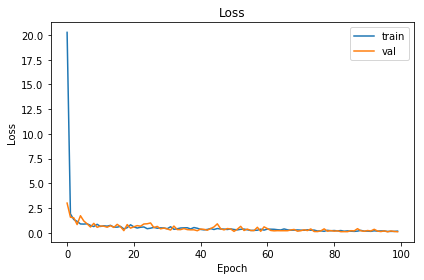

In [7]:
plot_acc_loss(history)

### Preparando arquivo de submissão 

In [17]:
df_test = pd.read_csv('data/data_test_fields.csv', sep=",")
x_test = np.array(df_test)
y_pred = model.predict(x_test)
scaller = MinMaxScaler(feature_range=(0,1))
y_pred = scaller.fit_transform(y_pred)
df_test['production'] = y_pred

In [18]:
df_test.shape

(4110, 17)

In [19]:
df_test.to_csv('data/submission.csv', sep=",", columns=['Id', 'production'], index=False)